# Libraries & Functions

In [1]:
'''Math & Data Libraries'''
import numpy as np
import pandas as pd

In [2]:
'''Visualization Libraries'''
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

sns.set_style("whitegrid", {"grid.color": "0.5", "axes.edgecolor": "0.2"})
color_palette = [ "#007597", "#FF8853", "#C1C36D", "#FFE174","#00A697", "#BC97E0", "#ffc0bf"]
sns.set_palette(sns.color_palette(color_palette))

In [4]:
import glob

# Input Data

### Search Terms
- 'ecology' OR 'biodiversity' AND "NLP" OR "Natural Language Processing" OR "text mining"
- 'ecology' OR 'biodiversity' AND "NLP" OR "Natural Language Processing" OR "text mining" AND 'Transformer' OR 'LLM' OR 'Large Language Model' OR 'foundation model'
- 'ecology' OR 'biodiversity' AND "CV" OR "Computer Vision" OR "image processing" OR "Machine vision"
- 'ecology' OR 'biodiversity' AND "CV" OR "Computer Vision" OR "image processing" OR "Machine vision" AND 'Transformer' OR 'VIT' OR 'foundation model'
- 'ecology' OR 'biodiversity' AND "Bioacoustic*" OR "acoustic*" OR "sound processing"
- 'ecology' OR 'biodiversity' AND "Bioacoustic*" OR "acoustic*" OR "sound processing" AND 'Transformer' OR 'HuBERT' OR 'foundation model'

### Links
- https://www.webofscience.com/wos/woscc/summary/586c4f49-9f70-4c57-92fe-7338802bb941-a29e3a71/relevance/1(overlay:export/exc)
- https://www.webofscience.com/wos/woscc/summary/927db2e3-6151-4b9d-b548-4a9df4262bc4-a29e18e4/relevance/1(overlay:export/exc)
- https://www.webofscience.com/wos/woscc/summary/3a5bd7e5-7016-4c3c-beb5-9bf0113b8302-a29e8551/relevance/1(overlay:export/exc)
- https://www.webofscience.com/wos/woscc/summary/bf3263d2-49c9-409e-bab6-1d58ad84fa57-a29e8745/relevance/1(overlay:export/exc)
- https://www.webofscience.com/wos/woscc/summary/f0df869e-6a1d-49d9-b536-6c436acaea35-a29e8c36/relevance/1(overlay:export/exc)
- https://www.webofscience.com/wos/woscc/summary/f90615ae-e259-412f-b11d-a5b48895c2f6-a29e8f21/relevance/1(overlay:export/exc)

In [17]:
df_literature_dict = {}
data_location = "../Datasets/WebOfScience/"


In [67]:
fields = ["NLP", "NLP_Transformers", "CV", "CV_Transformers", "Bioacoustics", "Bioacoustics_Transformers"]
for field in fields:
    print(field)
    df_tmp = pd.DataFrame()
    for name in glob.glob(data_location + f"Eco_{field}_Papers*.xls"):
        df_tmp = pd.concat([df_tmp, pd.read_excel(name)])
        print(name)
    df_literature_dict[field] = df_tmp
    if("Transformers" in field):
        df_literature_dict[field] = df_literature_dict[field][df_literature_dict[field]["Publication Year"]>2017]    


NLP
../Datasets/WebOfScience\Eco_NLP_Papers.xls
NLP_Transformers
../Datasets/WebOfScience\Eco_NLP_Transformers_Papers.xls
CV
../Datasets/WebOfScience\Eco_CV_Papers_1.xls
../Datasets/WebOfScience\Eco_CV_Papers_2.xls
CV_Transformers
../Datasets/WebOfScience\Eco_CV_Transformers_Papers.xls
Bioacoustics
../Datasets/WebOfScience\Eco_Bioacoustics_Papers_1.xls
../Datasets/WebOfScience\Eco_Bioacoustics_Papers_2.xls
../Datasets/WebOfScience\Eco_Bioacoustics_Papers_3.xls
../Datasets/WebOfScience\Eco_Bioacoustics_Papers_4.xls
Bioacoustics_Transformers
../Datasets/WebOfScience\Eco_Bioacoustics_Transformers_Papers.xls


In [68]:
for field in fields:
    print(field, df_literature_dict[field].shape)

NLP (157, 72)
NLP_Transformers (15, 72)
CV (1831, 72)
CV_Transformers (92, 72)
Bioacoustics (3377, 72)
Bioacoustics_Transformers (190, 72)


# Trend Visualizations

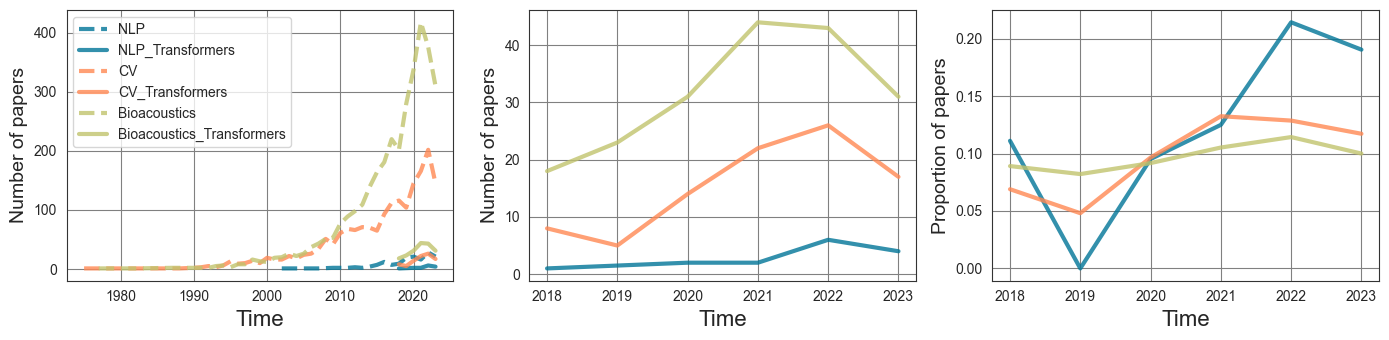

In [72]:
fig, axes  = plt.subplots(figsize=(14,3.5), ncols = 3)
plt.subplot(131)
for i, field in enumerate(fields):
    df_year = df_literature_dict[field]["Publication Year"].value_counts().sort_index()
    year = df_year.index
    N_papers = df_year.values
    linestyle = "--" if i%2==0 else "-"
    plt.plot(year, N_papers, color = color_palette[i//2], linestyle = linestyle, linewidth = 3, label = field, alpha = 0.8)

plt.xlabel("Time", size = 16)
plt.ylabel("Number of papers", size = 14)
plt.legend()

plt.subplot(132)
for i, field in enumerate(fields):
    if("Transformers" not in field):
        continue
    df_year = df_literature_dict[field]["Publication Year"].value_counts().sort_index()
    year = df_year.index
    N_papers = df_year.values
    linestyle = "-." if i%2==0 else "-"
    plt.plot(year, N_papers, color = color_palette[i//2], linestyle = linestyle, linewidth = 3, label = field, alpha = 0.8)

plt.xlabel("Time", size = 16)
plt.ylabel("Number of papers", size = 14)
# plt.legend()

plt.subplot(133)
for i, field in enumerate(fields):
    if("Transformers" in field):
        continue
    df_year = df_literature_dict[field]["Publication Year"].value_counts().sort_index()
    df_year_tr = df_literature_dict[field+"_Transformers"]["Publication Year"].value_counts().sort_index()
    linestyle = "-" if i%2==0 else "-."
    
    years = np.arange(2018, 2024)
    proportion = np.zeros(len(years))
    for year in df_year_tr.index:
        proportion[year-2018] = df_year_tr.loc[year] / df_year.loc[year]
    plt.plot(years, proportion, color = color_palette[i//2], linestyle = linestyle, linewidth = 3, label = field, alpha = 0.8)

plt.xlabel("Time", size = 16)
plt.ylabel("Proportion of papers", size = 14)
# plt.legend()

plt.tight_layout()
plt.show()